# KNN

In [256]:
# Requried librarys
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectPercentile 
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import chi2 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import  auc
from sklearn.model_selection import cross_val_score

In [257]:
# load data
dataset = pd.read_csv('ds_salaries.csv')

In [258]:
dataset.head(6)

,work_year,experience_level,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,salary
0,2023,SE,FT,Principal Data Scientist,EUR,85847,ES,100,ES,L,80000
1,2023,MI,CT,ML Engineer,USD,30000,US,100,US,S,30000
2,2023,MI,CT,ML Engineer,USD,25500,US,100,US,S,25500
3,2023,SE,FT,Data Scientist,USD,175000,CA,100,CA,M,175000
4,2023,SE,FT,Data Scientist,USD,120000,CA,100,CA,M,120000
5,2023,SE,FT,Applied Scientist,USD,222200,US,0,US,L,222200


In [259]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary_currency     3755 non-null   object
 5   salary_in_usd       3755 non-null   int64 
 6   employee_residence  3755 non-null   object
 7   remote_ratio        3755 non-null   int64 
 8   company_location    3755 non-null   object
 9   company_size        3755 non-null   object
 10  salary              3755 non-null   int64 
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [260]:
# need to Encoder text 
for column in dataset.columns :
    if dataset[column].dtype == "object":
        dataset[column] = LabelEncoder().fit_transform(dataset[[column]])

C:\Users\iRepair\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\iRepair\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\iRepair\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\iRepair\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

In [261]:
# Fill NaN values with the median of each column
dataset.fillna(dataset.median(), inplace=True)

In [262]:
# check if any outlire
for column in dataset.columns:
    # Calculate Q1, Q3, and IQR for the current column
    Q1 = dataset[column].quantile(0.25)
    Q3 = dataset[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Calculate lower and upper bounds for outlier detection
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    dataset[column] = np.where((dataset[column] < lower_bound) | (dataset[column] > upper_bound), dataset[column].median(), dataset[column])



In [263]:
# normaliz dataset 
dataset = MinMaxScaler(feature_range=(0,1)).fit_transform(dataset)

In [264]:
dataset[:4]

array([[1.        , 1.        , 0.        , 0.42857143, 0.        ,
        0.28038893, 0.        , 1.        , 0.        , 0.        ,
        0.25170068],
       [1.        , 0.5       , 0.        , 0.85714286, 0.        ,
        0.08638682, 0.        , 1.        , 0.        , 0.        ,
        0.08163265],
       [1.        , 0.5       , 0.        , 0.85714286, 0.        ,
        0.07075465, 0.        , 1.        , 0.        , 0.        ,
        0.06632653],
       [1.        , 1.        , 0.        , 0.61038961, 0.        ,
        0.5900899 , 0.        , 1.        , 0.        , 0.        ,
        0.57482993]])

In [265]:
# split data into features and target
data_x = dataset[:, :-1]  # Selects all rows and all columns except the last one
data_y = dataset[:,-1] 

In [266]:
data_y.shape

(3755,)

In [267]:
data_y[:10]

array([0.25170068, 0.08163265, 0.06632653, 0.57482993, 0.3877551 ,
       0.73537415, 0.44217687, 0.7244898 , 0.45918367, 0.47993197])

In [268]:
# select featues  
data_x = SelectPercentile(score_func=f_classif,percentile=55).fit_transform(data_x,data_y)

C:\Users\iRepair\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [2 4 6 8 9] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\iRepair\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [269]:
data_x.shape

(3755, 5)

In [270]:
# split into train and test 
x_train,x_test,y_train,y_test = train_test_split(data_x,data_y,test_size=0.2,random_state=44,shuffle=True)

In [271]:
print("X_Treain Shape is :",x_train.shape)
print("X_Test Shape is :",x_test.shape)
print("y_Treain Shape is :",y_train.shape)
print("y_Test Shape is :",y_test.shape)

X_Treain Shape is : (3004, 5)
X_Test Shape is : (751, 5)
y_Treain Shape is : (3004,)
y_Test Shape is : (751,)


In [272]:
# KNN
knn = KNeighborsRegressor(n_neighbors=2,weights='uniform',algorithm='auto').fit(x_train,y_train)

In [273]:
y_pred = knn.predict(x_test)

In [274]:
print("Test Score :",knn.score(x_test,y_test))
print("Train Score :",knn.score(x_train,y_train))

Test Score : 0.8666841697104013
Train Score : 0.9251391538190936


In [275]:
# Cros-Validation
scores = cross_val_score(knn, x_train, y_train, cv=5) 
print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())

Cross-validation scores: [0.81268325 0.79926669 0.84402415 0.80113223 0.84796548]
Mean accuracy: 0.8210143603928592


In [276]:
# Calculate different metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
# Print the metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)


Mean Absolute Error (MAE): 0.027364538891455386
Mean Squared Error (MSE): 0.004918238964241548
Root Mean Squared Error (RMSE): 0.07013015730940254
R-squared (R2): 0.8666841697104013


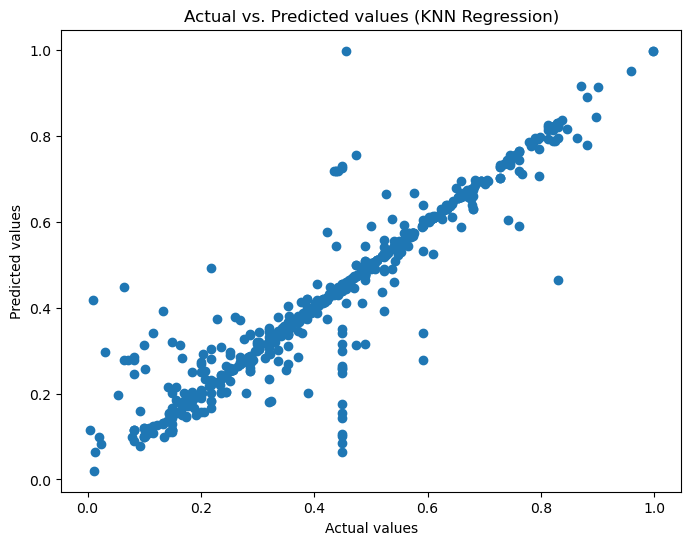

In [277]:
# Scatter plot for predicted vs. actual values insted of ROC curve
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs. Predicted values (KNN Regression)')
plt.show()


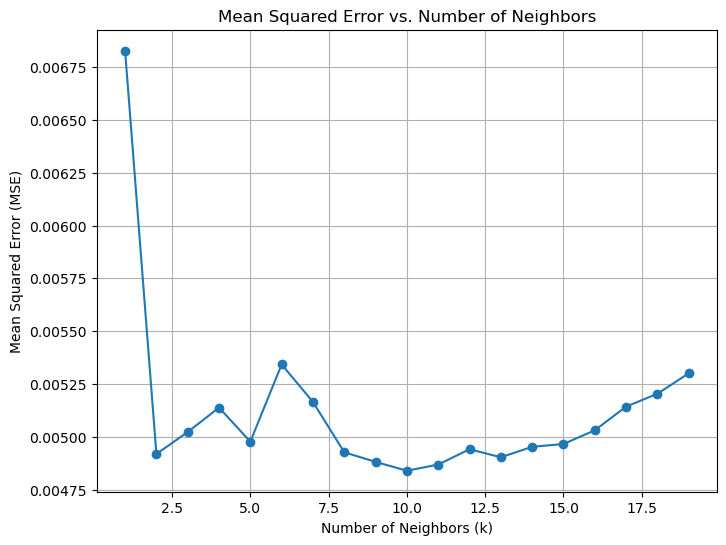

In [278]:
#loss curve
k_values = range(1, 20)  # Test different values of k
mse_values = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

# Plotting the error vs. k values
plt.figure(figsize=(8, 6))
plt.plot(k_values, mse_values, marker='o', linestyle='-')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Mean Squared Error vs. Number of Neighbors')
plt.grid(True)
plt.show()